In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to initialize the initial pageRank
def init(numNodes:int):
    x = np.ones((numNodes))/numNodes
    return x

In [21]:
# function to find pageRank iteratively
def bruteForce(x: np.array, P: np.array, threshold: float, damp=False, alpha=0.1):
    num_pages = x.shape[0] # number of pages in our graph
    rank = []   # a list to keep track of the evolution of the rank of each page
    min_iter = 0    # a variable to check when our iteration reaches below threshold

    # if damp == True, we modify our P matrix
    if damp:
        P = (1-alpha)*(P.T) + (alpha/num_pages)*np.ones((num_pages,num_pages)) # the equation uses a transposed hyperlink matrix
        P = P.T # we change it back to our original orientation
        print(P)

    # append initial page rank of each page
    for i in range(num_pages):
        rank.append([x[i]])

    # iterations
    for i in range(200):
        x_new = np.matmul(P, x) # calculate new pageRank

        # add new page rank into the evolution list
        for j in range(num_pages):
            rank[j].append(x[j])
        
        # check if the difference between old and new pageRank vector is less than threshold
        # and if minimum iteration is zero to set minimum iteration
        if np.linalg.norm(x_new - x) <= threshold and min_iter == 0:
            min_iter = i

        # change pageRank vector to the new calculated pageRank vector
        x = x_new

    # return the pagerank vector, minimum iteration required and the evolution list
    return x, min_iter, rank

In [22]:
def eigenSolver(P:np.array)->np.array:
    eigenvalue, eigenvector = np.linalg.eig(P.T)
    dominant_value = np.argmax(eigenvalue.real)
    dominant_vector = (eigenvector[:,dominant_value]).real
    dominant_vector = dominant_vector/np.sum(dominant_vector)

    return dominant_vector


In [23]:
# a function to plot the pageRank evolution
def plot(rank:np.array, numNodes:int, min_iter:int):
    numIteration = len(rank[0]) # get the number of iterations performed
    
    # loop through number of pages and for each plot a line
    for i in range(numNodes):
        plt.plot(range(numIteration), rank[i], label = f"Page {i+1}")
    
    # plot a vertical line to show minimum iteration on the plot
    plt.axvline(x=min_iter, linestyle='--', label='Minimum Iteration')
    plt.legend()    # turn on the legend
    plt.xlabel("Number of Iterations")  # Change x label
    plt.ylabel("Page Rank")  # Change y label
    plt.show()

In [33]:
numPages = 5
x = init(numPages)

P = np.array(((0, 0.5, 0, 0, 0), (1, 0, 0.5, 0.5, 0), (0, 0, 0, 0, 1), (0, 0, 0.5, 0, 0),
              (0, 0.5, 0, 0.5, 0)))
#P = np.array(((0.0, 1.0, 0.0, 0.0), (1.0 , 0.0, 0.0, 0.0), (0.0, 0.5, 0.0, 0.5), (0.5, 0, 0.5, 0)))

print(f"Initial x = {x}")

# print(f"P = \n{P}")
x, min_iter, rank = bruteForce(x, P, 0.001, damp=True, alpha=0.15)
print(f"After PageRank is applied x = {x}")

Initial x = [0.2 0.2 0.2 0.2 0.2]
After PageRank is applied x = [0.15931827 0.30427827 0.20822745 0.11849666 0.20967935]


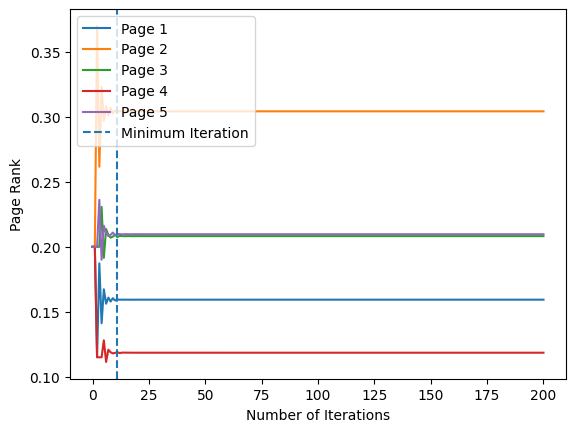

In [34]:
plot(rank, numPages, min_iter=min_iter)